# EDA

In [97]:
import pandas as pd

df = pd.read_csv('police_health_dataset.csv',index_col=0)
df

,post,posted_city,pollution_index,city_workload_index,age,gender,years_of_service,height_cm,weight_kg,bmi,...,smoking,alcohol,stress_level,shift_pattern,working_hours_per_week,healthcare_scheme,technological_support,predictive_system_usage,risk_score,risk_category
personnel_id,,,,,,,,,,,,,,,,,,,,,
100000,Assistant Superintendent of Police,Kochi,48.0,3.0,21.0,Male,3.0,168.0,84.5,29.9,...,No,No,6.0,Rotational,42.0,NaN,NaN,No,57.86,Borderline ⚠
100001,Traffic Superintendent,Lucknow,68.0,6.0,25.0,Male,0.0,178.0,81.9,25.8,...,No,No,6.0,Rotational,42.0,Scheme A,Low,No,44.76,Normal ✅
100002,Sub-Inspector,Kanpur,75.0,7.0,21.0,Male,0.0,175.0,80.2,26.2,...,No,Yes,7.0,Rotational,47.0,MPKAY,Medium,No,25.10,Normal ✅
100003,Assistant Commissioner of Police,Bhopal,60.0,4.0,23.0,Male,2.0,169.0,49.1,17.2,...,No,No,10.0,Rotational,41.0,NaN,High,No,14.15,Normal ✅
100004,Commissioner of Police,Nagpur,66.0,5.0,48.0,Male,23.0,183.0,100.6,30.0,...,No,Yes,2.0,Rotational,53.0,NaN,Low,No,69.16,Borderline ⚠
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162393,Joint Commissioner of Police,Visakhapatnam,52.0,3.0,24.0,Female,4.0,168.0,76.8,27.2,...,No,No,8.0,Rotational,50.0,Dhanwantri,Low,No,44.61,Normal ✅
162394,Additional Superintendent of Police,Surendranagar,42.0,2.0,22.0,Male,0.0,183.0,68.3,20.4,...,No,No,5.0,Rotational,65.0,Dhanwantri,Low,Yes,4.96,Normal ✅
162395,Constable,Mumbai,78.0,7.0,42.0,Male,18.0,178.0,78.6,24.8,...,Yes,Yes,7.0,Rotational,42.0,Police Health Scheme,Low,No,67.08,Borderline ⚠


In [104]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 62398 entries, 100000 to 162397
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post                     62398 non-null  object 
 1   posted_city              62398 non-null  object 
 2   pollution_index          62398 non-null  float64
 3   city_workload_index      62398 non-null  float64
 4   age                      62398 non-null  float64
 5   gender                   62398 non-null  object 
 6   years_of_service         62398 non-null  float64
 7   height_cm                61650 non-null  float64
 8   weight_kg                61650 non-null  float64
 9   bmi                      62398 non-null  float64
 10  systolic_bp              61650 non-null  float64
 11  diastolic_bp             61650 non-null  float64
 12  heart_rate               62398 non-null  float64
 13  spo2                     61650 non-null  float64
 14  fasting_blood_sugar  

In [99]:
print(df.describe())

       pollution_index  city_workload_index           age  years_of_service  \
count     62398.000000         62398.000000  62398.000000      62398.000000   
mean         61.086878             4.731273     35.137793         12.396792   
std          11.208397             1.754469      7.722177          8.229125   
min          40.000000             2.000000     21.000000          0.000000   
25%          53.000000             3.000000     30.000000          6.000000   
50%          62.000000             5.000000     35.000000         12.000000   
75%          68.000000             6.000000     40.000000         18.000000   
max          85.000000             8.000000     62.000000         40.000000   

          height_cm     weight_kg           bmi   systolic_bp  diastolic_bp  \
count  61650.000000  61650.000000  62398.000000  61650.000000  61650.000000   
mean     171.971922     74.078962     24.999462    117.940746     72.573139   
std        7.007283     13.417539      4.014807    

In [100]:
print(df.isnull().sum())

post                           0
posted_city                    0
pollution_index                0
city_workload_index            0
age                            0
gender                         0
years_of_service               0
height_cm                    748
weight_kg                    748
bmi                            0
systolic_bp                  748
diastolic_bp                 748
heart_rate                     0
spo2                         748
fasting_blood_sugar          748
cholesterol                  748
chronic_disease            53220
sleep_hours                    0
exercise_mins_per_week         0
smoking                        0
alcohol                        0
stress_level                   0
shift_pattern                  0
working_hours_per_week         0
healthcare_scheme          15530
technological_support      14265
predictive_system_usage        0
risk_score                     0
risk_category                  0
dtype: int64


In [101]:
# Check duplicate rows
print(df.duplicated().sum())

0


# Preprocessing

In [105]:
# Numeric columns: fill NaN with mean
numeric_cols = df.select_dtypes(include='float64').columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Categorical columns: fill NaN with mode or 'NA'
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Tejas Pund\AppData\Local\Temp\ipykernel_20660\3220027023.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Tejas Pund\AppData\Local\Temp\ipykernel_20660\3220027023.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [ ]:
# Verify Null Values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 62398 entries, 100000 to 162397
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post                     62398 non-null  object 
 1   posted_city              62398 non-null  object 
 2   pollution_index          62398 non-null  float64
 3   city_workload_index      62398 non-null  float64
 4   age                      62398 non-null  float64
 5   gender                   62398 non-null  object 
 6   years_of_service         62398 non-null  float64
 7   height_cm                62398 non-null  float64
 8   weight_kg                62398 non-null  float64
 9   bmi                      62398 non-null  float64
 10  systolic_bp              62398 non-null  float64
 11  diastolic_bp             62398 non-null  float64
 12  heart_rate               62398 non-null  float64
 13  spo2                     62398 non-null  float64
 14  fasting_blood_sugar  

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
joblib.dump(scaler, 'scaler.pkl')

Index(['pollution_index', 'city_workload_index', 'age', 'years_of_service',
       'height_cm', 'weight_kg', 'bmi', 'systolic_bp', 'diastolic_bp',
       'heart_rate', 'spo2', 'fasting_blood_sugar', 'cholesterol',
       'sleep_hours', 'exercise_mins_per_week', 'stress_level',
       'working_hours_per_week', 'risk_score'],
      dtype='object')


In [110]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    joblib.dump(le, f'encoder_{col}.pkl')

# Model Training

Split Data 80% Training & 20% Testing

In [155]:
drop_cols = ['risk_score', 'risk_category']  # keep only features
X = df.drop(columns=drop_cols)
y = df['risk_score']

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [159]:
# print(X.shape)
# print(y)
# print(y.shape)
y

personnel_id
100000    0.429129
100001   -0.182477
100002   -1.100354
100003   -1.611582
100004    0.956698
            ...   
162393   -0.189480
162394   -2.040640
162395    0.859588
162396   -1.713361
162397    2.396540
Name: risk_score, Length: 62398, dtype: float64

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (49918, 27)
Test set shape: (12480, 27)


In [162]:
import joblib

# Save feature column names
feature_cols = X_train.columns.tolist()
print(feature_cols)
joblib.dump(feature_cols, 'feature_columns.pkl')
print("Feature columns saved:", feature_cols)

['post', 'posted_city', 'pollution_index', 'city_workload_index', 'age', 'gender', 'years_of_service', 'height_cm', 'weight_kg', 'bmi', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'spo2', 'fasting_blood_sugar', 'cholesterol', 'chronic_disease', 'sleep_hours', 'exercise_mins_per_week', 'smoking', 'alcohol', 'stress_level', 'shift_pattern', 'working_hours_per_week', 'healthcare_scheme', 'technological_support', 'predictive_system_usage']
Feature columns saved: ['post', 'posted_city', 'pollution_index', 'city_workload_index', 'age', 'gender', 'years_of_service', 'height_cm', 'weight_kg', 'bmi', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'spo2', 'fasting_blood_sugar', 'cholesterol', 'chronic_disease', 'sleep_hours', 'exercise_mins_per_week', 'smoking', 'alcohol', 'stress_level', 'shift_pattern', 'working_hours_per_week', 'healthcare_scheme', 'technological_support', 'predictive_system_usage']


# Model Selection and Fitting

Using Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [165]:
# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

In [166]:
# Train the model
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [167]:
# Predict on test set
y_pred = rf_model.predict(X_test)

Evaluation

In [168]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [169]:
print("Mean Squared Error:", mse)
print("R2 Score for Random Forest:", r2)

Mean Squared Error: 0.05328823463965526
R2 Score for Random Forest: 0.9462340463862223


Using XGBoost

In [170]:
import xgboost as xgb

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

In [171]:
# Train the model
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [172]:
# Predict on test set
y_pred = xgb_model.predict(X_test)

In [173]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score for XGBoost:", r2)

Mean Squared Error: 0.01696416275113511
R2 Score for XGBoost: 0.9828837567290069


Finalize we are Using XGBoost

In [174]:
joblib.dump(xgb_model, 'xgb_risk_model.pkl')
print("XGBoost risk_score model saved successfully!")

XGBoost risk_score model saved successfully!


In [176]:
# We can use thresholds to classify the predicted risk score:
def risk_category(score):
    if score < 0.33:
        return "Low"
    elif score < 0.66:
        return "Medium"
    else:
        return "High"

# Apply on test set
y_test_category = y_test.apply(risk_category)
y_pred_category = pd.Series(y_pred).apply(risk_category)

# Verification

In [177]:
# Map actual risk_score to category
y_actual_category = df.loc[y_test.index, 'risk_score'].apply(risk_category)

# Map predicted risk_score to category
y_pred_category = pd.Series(y_pred).apply(risk_category)

Compare Actual vs Predicted

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
acc = accuracy_score(y_actual_category, y_pred_category)
print("Risk Category Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_actual_category, y_pred_category, labels=["Low","Medium","High"])
print("\nConfusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_actual_category, y_pred_category, labels=["Low","Medium","High"])
print("\nClassification Report:\n", cr)

Risk Category Accuracy: 0.9427083333333334

Confusion Matrix:
 [[7728  196    1]
 [ 140 1030  188]
 [  33  157 3007]]

Classification Report:
               precision    recall  f1-score   support

         Low       0.98      0.98      0.98      7925
      Medium       0.74      0.76      0.75      1358
        High       0.94      0.94      0.94      3197

    accuracy                           0.94     12480
   macro avg       0.89      0.89      0.89     12480
weighted avg       0.94      0.94      0.94     12480



In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
# Labels for axes
labels = ["Low","Medium","High"]

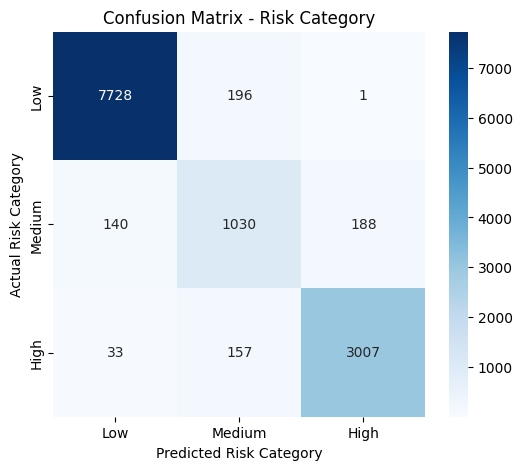

In [131]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Risk Category')
plt.ylabel('Actual Risk Category')
plt.title('Confusion Matrix - Risk Category')
plt.show()

# Model Training Risk Score

Model: XGBoost Regressor
Training results:
Mean Squared Error (MSE): 0.01696
R² Score: 0.98288 (excellent performance)

Model: RandomForest Regressor
Training results:
Mean Squared Error (MSE): 0.053380
R² Score: 0.946141 (Good performance)

# Risk Category Assignment

Predicted risk_score mapped to risk_category using thresholds:
Low: score < 0.33
Medium: 0.33 ≤ score < 0.66
High: score ≥ 0.66
-> Cross-checked predicted vs actual categories
-> Confusion matrix visualized for evaluation

In [178]:
import joblib
feature_cols = joblib.load('feature_columns.pkl')
print(feature_cols)

['post', 'posted_city', 'pollution_index', 'city_workload_index', 'age', 'gender', 'years_of_service', 'height_cm', 'weight_kg', 'bmi', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'spo2', 'fasting_blood_sugar', 'cholesterol', 'chronic_disease', 'sleep_hours', 'exercise_mins_per_week', 'smoking', 'alcohol', 'stress_level', 'shift_pattern', 'working_hours_per_week', 'healthcare_scheme', 'technological_support', 'predictive_system_usage']


Testing Sample

In [ ]:
import pandas as pd
import joblib
from xgboost import XGBRegressor

# Load saved objects
scaler = joblib.load('scaler.pkl')
feature_cols = ['post', 'posted_city', 'pollution_index', 'city_workload_index', 'age',
                'gender', 'years_of_service', 'height_cm', 'weight_kg', 'bmi',
                'systolic_bp', 'diastolic_bp', 'heart_rate', 'spo2', 'fasting_blood_sugar',
                'cholesterol', 'chronic_disease', 'sleep_hours', 'exercise_mins_per_week',
                'smoking', 'alcohol', 'stress_level', 'shift_pattern', 'working_hours_per_week',
                'healthcare_scheme', 'technological_support', 'predictive_system_usage']

# Load encoders
categorical_cols = ['post','posted_city','gender','chronic_disease','smoking','alcohol',
                    'shift_pattern','healthcare_scheme','technological_support','predictive_system_usage']
encoders = {col: joblib.load(f'encoder_{col}.pkl') for col in categorical_cols}

# Load trained model
xgb_model = joblib.load('xgb_risk_model.pkl')

def predict_risk(sample_df):
    # Keep only the correct feature columns and order
    sample_df = sample_df[feature_cols].copy()
    
    # Scale numeric columns
    numeric_cols = sample_df.select_dtypes(include='number').columns
    sample_df[numeric_cols] = scaler.transform(sample_df[numeric_cols])
    
    # Encode categorical columns
    for col in categorical_cols:
        sample_df[col] = encoders[col].transform(sample_df[col])
    
    # Predict risk score
    risk_score = xgb_model.predict(sample_df)[0]
    
    # Map to risk category
    if risk_score < 0.33:
        risk_category = "Low"
    elif risk_score < 0.66:
        risk_category = "Medium"
    else:
        risk_category = "High"
    
    return risk_score, risk_category

# Example usage
new_sample = pd.DataFrame({
    'post': ['Constable'], 'posted_city': ['Mumbai'], 'pollution_index': [65.0],
    'city_workload_index': [75.0], 'age': [35], 'gender': ['Male'], 'years_of_service': [10],
    'height_cm': [170], 'weight_kg': [70], 'bmi': [24.2], 'systolic_bp': [120], 'diastolic_bp': [80],
    'heart_rate': [72], 'spo2': [98], 'fasting_blood_sugar': [90], 'cholesterol': [180],
    'chronic_disease': ['NA'], 'sleep_hours': [6], 'exercise_mins_per_week': [120],
    'smoking': ['No'], 'alcohol': ['No'], 'stress_level': [0.5], 'shift_pattern': ['Day'],
    'working_hours_per_week': [45], 'healthcare_scheme': ['Scheme A'], 
    'technological_support': ['Yes'], 'predictive_system_usage': ['Yes']
})

score, category = predict_risk(new_sample)
print("Predicted Risk Score:", score)
print("Predicted Risk Category:", category)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- risk_score
